In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import vrpSolver

## Use `geoJSON` to create road network

In this notebook, we are going to use local `geoJSON` file to 
- Create road network
- Display road network
- Randomly sample customers locations on road network/residential area

### 0. Preparation

To use `geoJSON` functions, we need to download the `geoJSON` files. Typically, we can get`geoJSON` file from OpenStreetMap website.
Ref: https://wiki.openstreetmap.org/wiki/Downloading_data

In this demo, we are using a `geoJSON` file of Buffalo, NY, U.S. (Jan. 20, 2022)

In [2]:
geoJSON = "../data/Buffalo.geojson"

### 1. Read highways fron `geoJSON` file
catergorize by motorway, country level roads, residential streets

In [3]:
network = vrpSolver.readHighwaysFromGeoJSON(geoJSON)

### 2. Plot road network

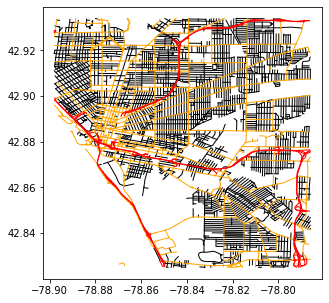

In [4]:
# Residential streets are plotted in black
fig, ax = vrpSolver.plotRoadNetwork(
    roadNetowrk=network['residential'],
    color = 'green',
)
# Primary, secondary, etc.， levels are plotted in orange
fig, ax = vrpSolver.plotRoadNetwork(
    fig = fig,
    ax = ax,
    color = 'orange',
    roadNetowrk=network['country']
)
# Motorways are plotted in red
fig, ax = vrpSolver.plotRoadNetwork(
    fig = fig,
    ax = ax,
    color = 'red',
    roadNetowrk=network['motorway']
)

### 3. Randomly (uniformly) create customers on residential roads

In [5]:
customers = vrpSolver.rndPlainNodes(
    N = 20,
    distr = "uniformRoadNetwork",
    distrArgs = {'roadNetwork': network['residential']})

In [7]:
fig, ax = vrpSolver.plotNodes(
    fig = fig,
    ax = ax,
    nodes = customers,
    color = 'black'
    xyReverseFlag = True)

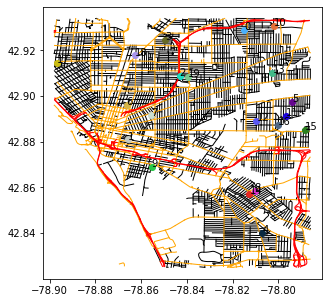

In [8]:
fig